In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

In [12]:

# Step 2: Load the Dataset
df = pd.read_excel("Coffee Shop Sales.xlsx")

In [13]:
df.head(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [16]:
# Check the general structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [18]:
# Check for missing values
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [20]:
# Step 3: Data Cleaning
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time
df['day'] = df['transaction_date'].dt.day
df['month'] = df['transaction_date'].dt.month
df['year'] = df['transaction_date'].dt.year
df['weekday'] = df['transaction_date'].dt.weekday

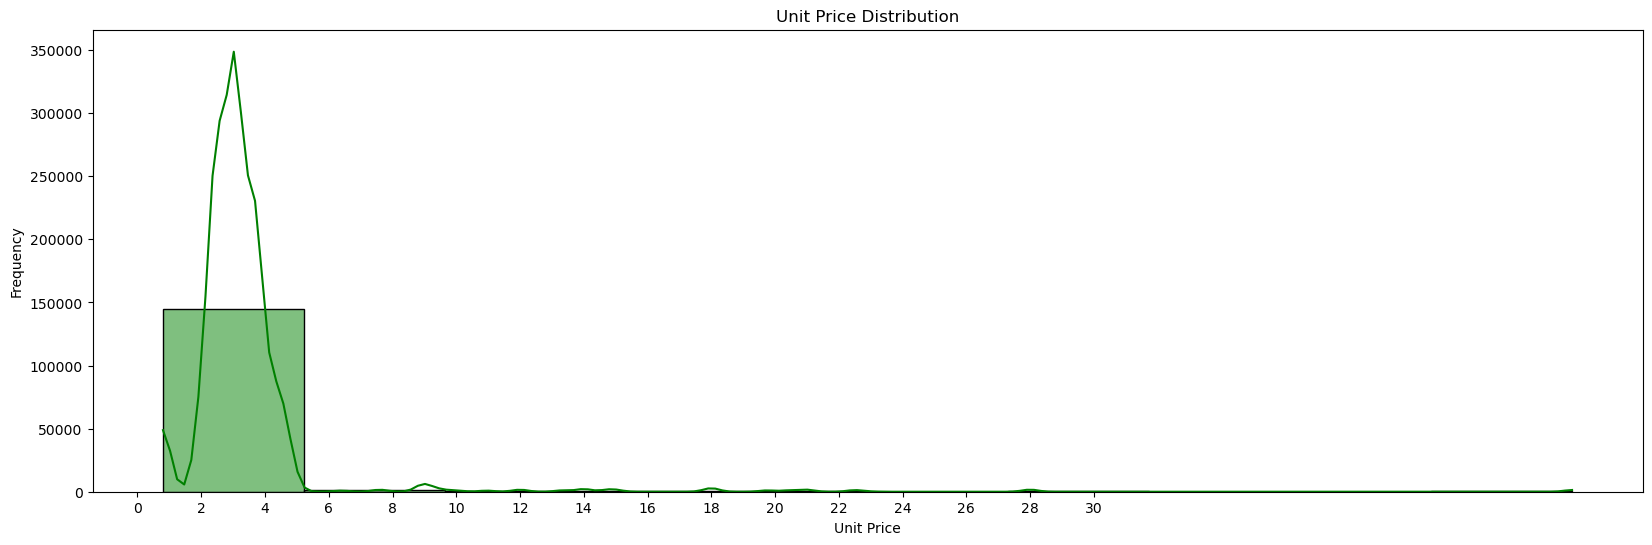

In [22]:
# Step 4: Individual Attribute Analysis
# Sales Distribution
plt.figure(figsize=(20, 6))
sns.histplot(df['unit_price'], bins=10, kde=True, color='green')
plt.xticks(np.arange(0, 31, 2))
plt.title('Unit Price Distribution')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

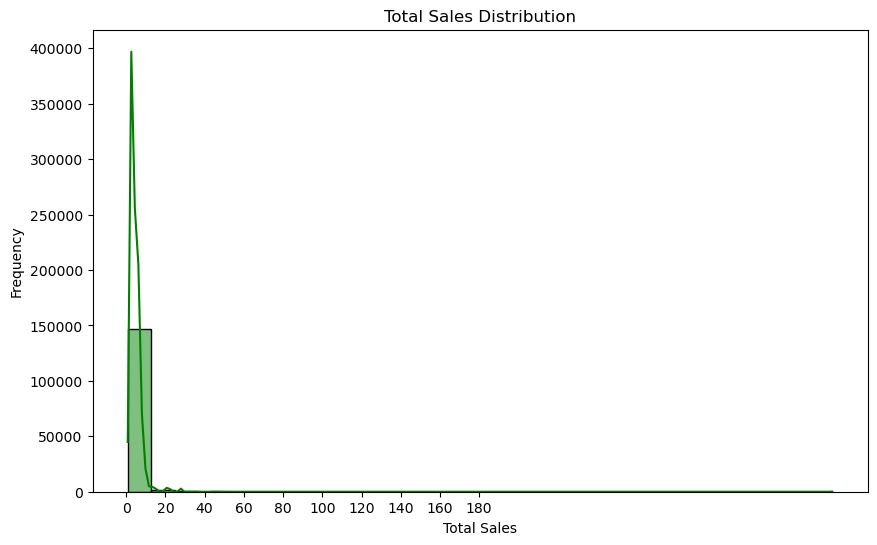

In [32]:

# Total sales distribution
df['total_sales'] = df['transaction_qty'] * df['unit_price']
plt.figure(figsize=(10, 6))
sns.histplot(df['total_sales'], bins=30, kde=True, color='green')
plt.title('Total Sales Distribution')
plt.xlabel('Total Sales')
plt.xticks(np.arange(0, 200, 20))
plt.ylabel('Frequency')
plt.show()


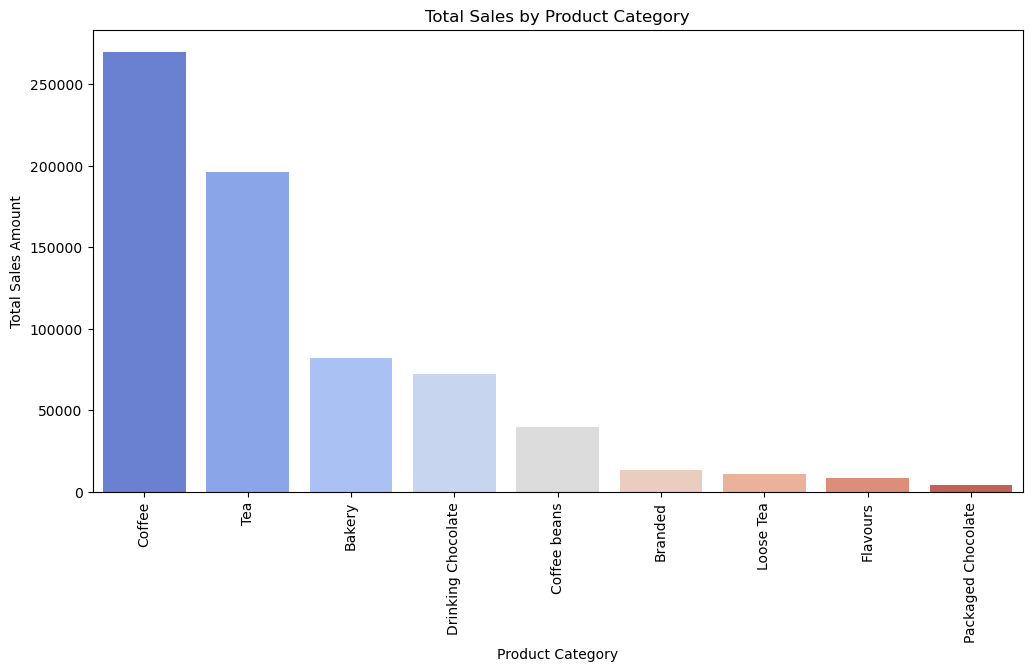

In [36]:
# Step 5: Product Sales Analysis
# Sales by Product Category
category_sales = df.groupby('product_category')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, hue=category_sales.index, palette='coolwarm', legend=False)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.show()

/var/folders/k6/l1klvwsx4dzbpf7bl7_0t6kc0000gn/T/ipykernel_7100/1237085009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_sales.index, y=type_sales.values, palette='Set2')


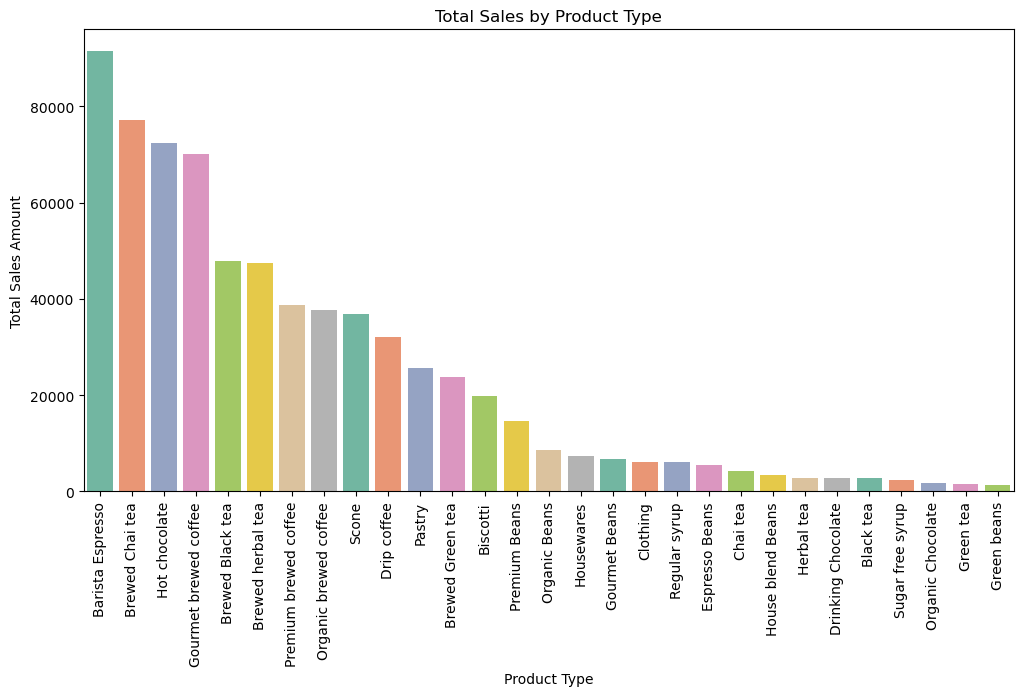

In [38]:
# Sales by Product Type
type_sales = df.groupby('product_type')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=type_sales.index, y=type_sales.values, palette='Set2')
plt.title('Total Sales by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.show()


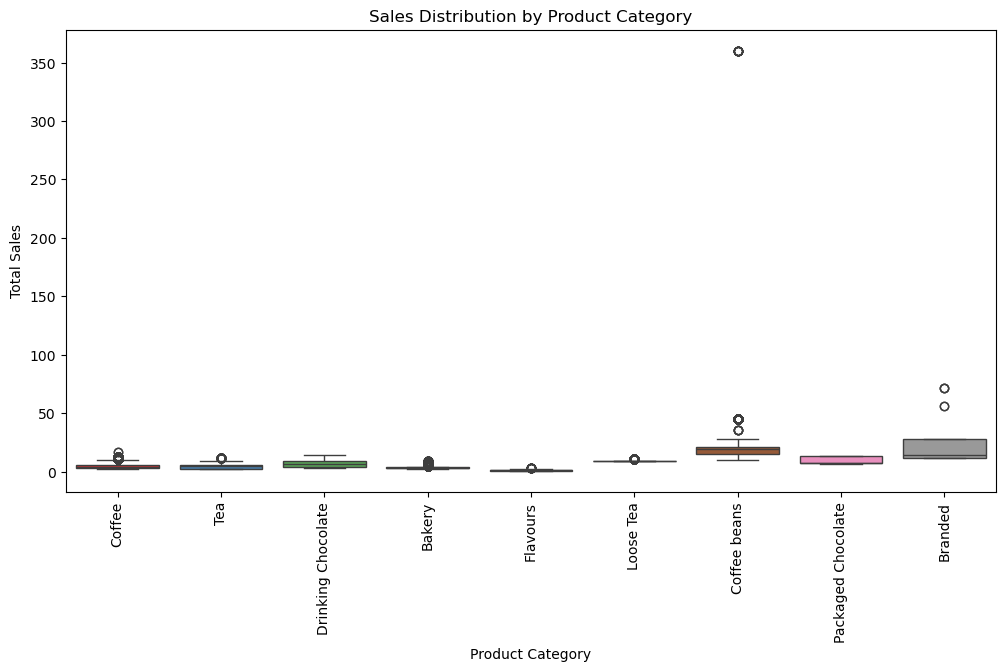

In [40]:
# Step 6: Bivariate Analysis
# Sales vs Product Category (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category', y='total_sales', hue='product_category', data=df, palette='Set1', legend=False)
plt.title('Sales Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

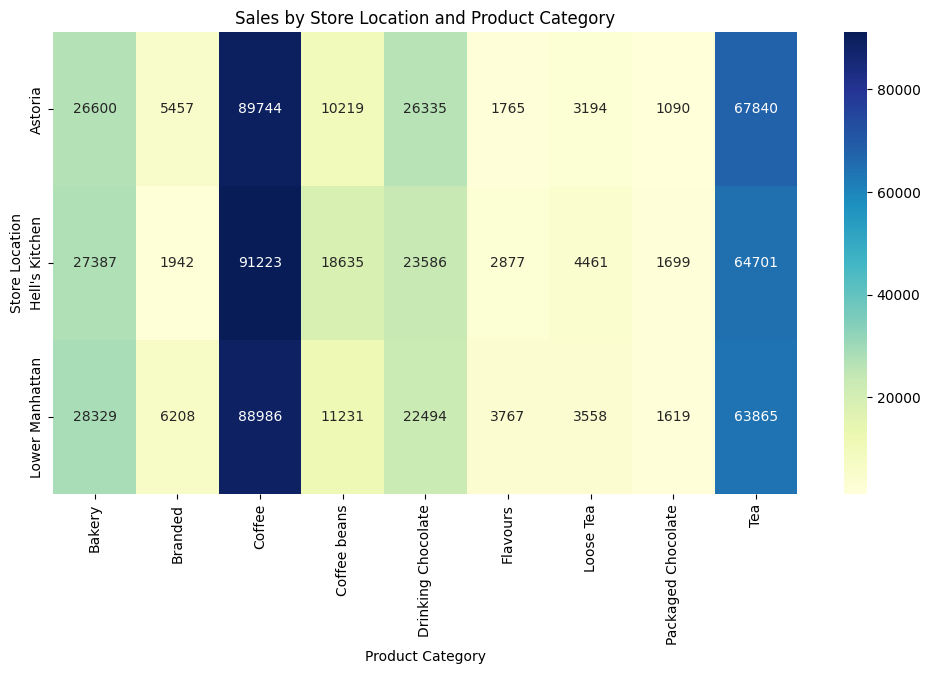

In [16]:
# Sales by Store Location and Product Category (Heatmap)
store_category_sales = df.groupby(['store_location', 'product_category'])['total_sales'].sum().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(store_category_sales, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Sales by Store Location and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Store Location')
plt.show()


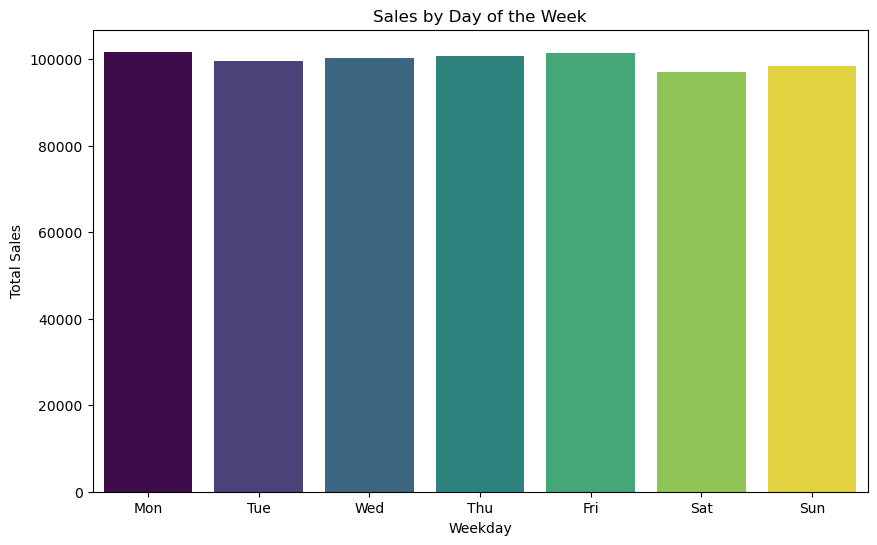

In [42]:
# Step 7: Time Analysis
# Sales by Day of the Week
sales_by_weekday = df.groupby('weekday')['total_sales'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_weekday.index,y=sales_by_weekday.values,hue=sales_by_weekday.index,palette='viridis',legend=False                         )
plt.title('Sales by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

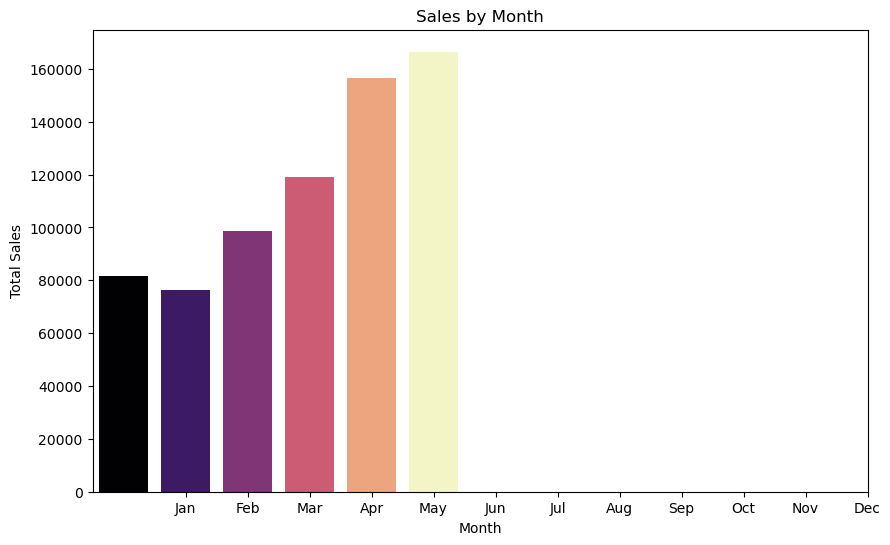

In [44]:
# Sales by Month
sales_by_month = df.groupby('month')['total_sales'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_month.index,y=sales_by_month.values,hue=sales_by_month.index,palette='magma',legend=False)
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()